In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/My Drive/UFO_Sitings.csv",low_memory=False)

In [ ]:
df=pd.read_csv("UFO_Sitings.csv",low_memory=False)

In [ ]:
df.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [ ]:
df.describe

<bound method NDFrame.describe of                datetime                  city  ...    latitude  longitude 
0      10/10/1949 20:30            san marcos  ...  29.8830556  -97.941111
1      10/10/1949 21:00          lackland afb  ...    29.38421  -98.581082
2      10/10/1955 17:00  chester (uk/england)  ...        53.2   -2.916667
3      10/10/1956 21:00                  edna  ...  28.9783333  -96.645833
4      10/10/1960 20:00               kaneohe  ...  21.4180556 -157.803611
...                 ...                   ...  ...         ...         ...
80327    9/9/2013 21:15             nashville  ...  36.1658333  -86.784444
80328    9/9/2013 22:00                 boise  ...  43.6136111 -116.202500
80329    9/9/2013 22:00                  napa  ...  38.2972222 -122.284444
80330    9/9/2013 22:20                vienna  ...  38.9011111  -77.265556
80331    9/9/2013 23:00                edmond  ...  35.6527778  -97.477778

[80332 rows x 11 columns]>

In [ ]:
df.shape

(80332, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [ ]:
null_vals = df.isnull().sum()
nul_per = (null_vals / len(df))*100
print(' Null Values (% of columns):')
print(round(nul_per.sort_values(ascending=False),2))

 Null Values (% of columns):
country                 12.04
state                    7.22
shape                    2.41
comments                 0.02
longitude                0.00
latitude                 0.00
date posted              0.00
duration (hours/min)     0.00
duration (seconds)       0.00
city                     0.00
datetime                 0.00
dtype: float64


In [ ]:

ufo_df=pd.read_csv("/content/drive/My Drive/UFO_Sitings.csv",low_memory=False,na_values = ['UNKNOWN','UNK'],na_filter = True, skip_blank_lines = True) 

In [ ]:
df=pd.read_csv("UFO_Sitings.csv",low_memory=False,na_values = ['UNKNOWN','UNK'],na_filter = True, skip_blank_lines = True)

In [ ]:
ufo_df.drop('duration (hours/min)', axis=1, inplace=True)

In [ ]:
ufo_df = ufo_df.dropna(thresh=8)
ufo_df = ufo_df.reset_index(drop=True)


In [ ]:
ufo_df.rename(columns={'country':'Country','state':'State','shape':'Shape_of_UFO','comments':'Description_of_UFO','longitude ':'Longitude','latitude':'Latitude','duration (seconds)':'Duration(in secs)', 'city':'City', 'datetime':'DateTime','date posted':'DatePosted'}, inplace=True)

In [ ]:
ufo_df.head(5)

,DateTime,City,State,Country,Shape_of_UFO,Duration(in secs),Description_of_UFO,DatePosted,Latitude,Longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [ ]:
ufo_df.shape

(80257, 10)

In [ ]:
ufo_df['DateTime'] = ufo_df.DateTime.str.replace('24:00', '00:00')
ufo_df['DateTime'] = pd.to_datetime(ufo_df['DateTime'], format='%m/%d/%Y %H:%M')

In [ ]:
ufo_df['Latitude'] = pd.to_numeric(ufo_df['Latitude'],errors = 'coerce')  
ufo_df['Longitude'] = pd.to_numeric(ufo_df['Longitude'], errors='coerce')

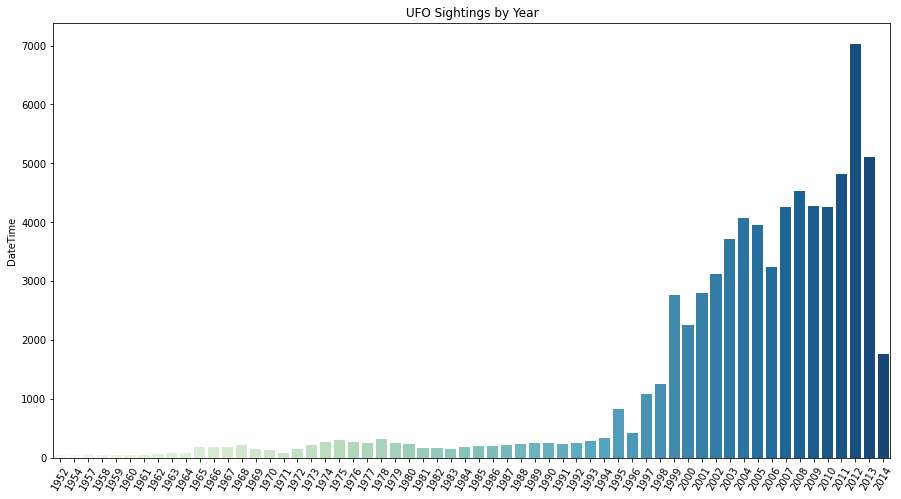

In [ ]:
ufo_yr = ufo_df['DateTime'].dt.year 
years_data = ufo_yr.value_counts()
years_index = years_data.index  
years_values = years_data[1:]

## Create Bar Plot ##
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Year')

years_plot = sns.barplot(x=years_index[:60],y=years_values[:60], palette = "GnBu")

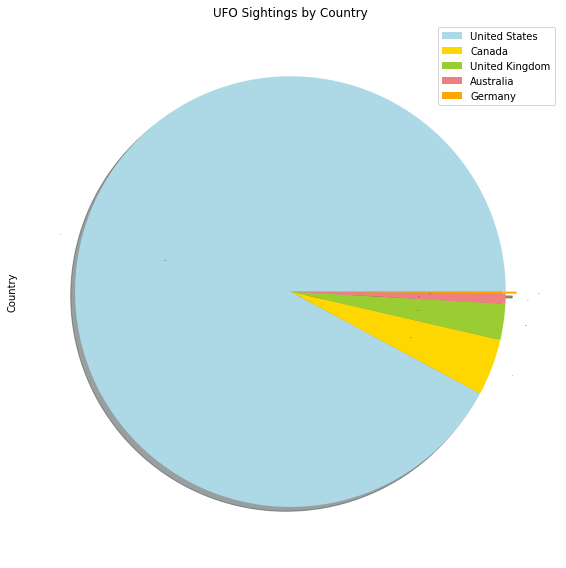

In [ ]:
country_sightings = ufo_df.Country.value_counts()  # num ufo sightings per country 

explode = (0, 0, 0, 0., 0.05)
colors = ['lightblue','gold','yellowgreen','lightcoral','orange']
country_sightings.plot(kind = 'pie', fontsize = 0, title='UFO Sightings by Country', colors=colors,
                       autopct='%1.1f%%',shadow=True, explode=explode,figsize=(8,8))
plt.legend(labels=['United States','Canada','United Kingdom','Australia','Germany'], loc="best")
plt.tight_layout()